<a href="https://colab.research.google.com/github/landonpadg/ADS504-Team-7-Spotify-Data/blob/main/Spotify_Song_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spotify Song Popularity Predictions Code Appendix**

**Team 4**



In [3]:
#load in necessary libraries and file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsRegressor

**Exploratory Data Analysis**

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import spotify_dataset.csv
os.chdir('/content/drive/My Drive/ADS 504 Final Project: Group 7')
os.listdir
spotify_data = pd.read_csv('spotify_dataset.csv')
spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
# Set display options to show more columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#Summary Statistics
print("\nSummary statistics:")
spotify_data.describe()


Summary statistics:


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
#Checking for missing values
print("\nMissing values in each column:")
spotify_data.isnull().sum()


Missing values in each column:


,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [9]:
# Replace null values with unknown
# This will aid in modeling
spotify_data_filled = spotify_data.fillna('Unknown')

In [10]:
#Data types of each column
print("\nData types of each column:")
spotify_data.dtypes


Data types of each column:


,0
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


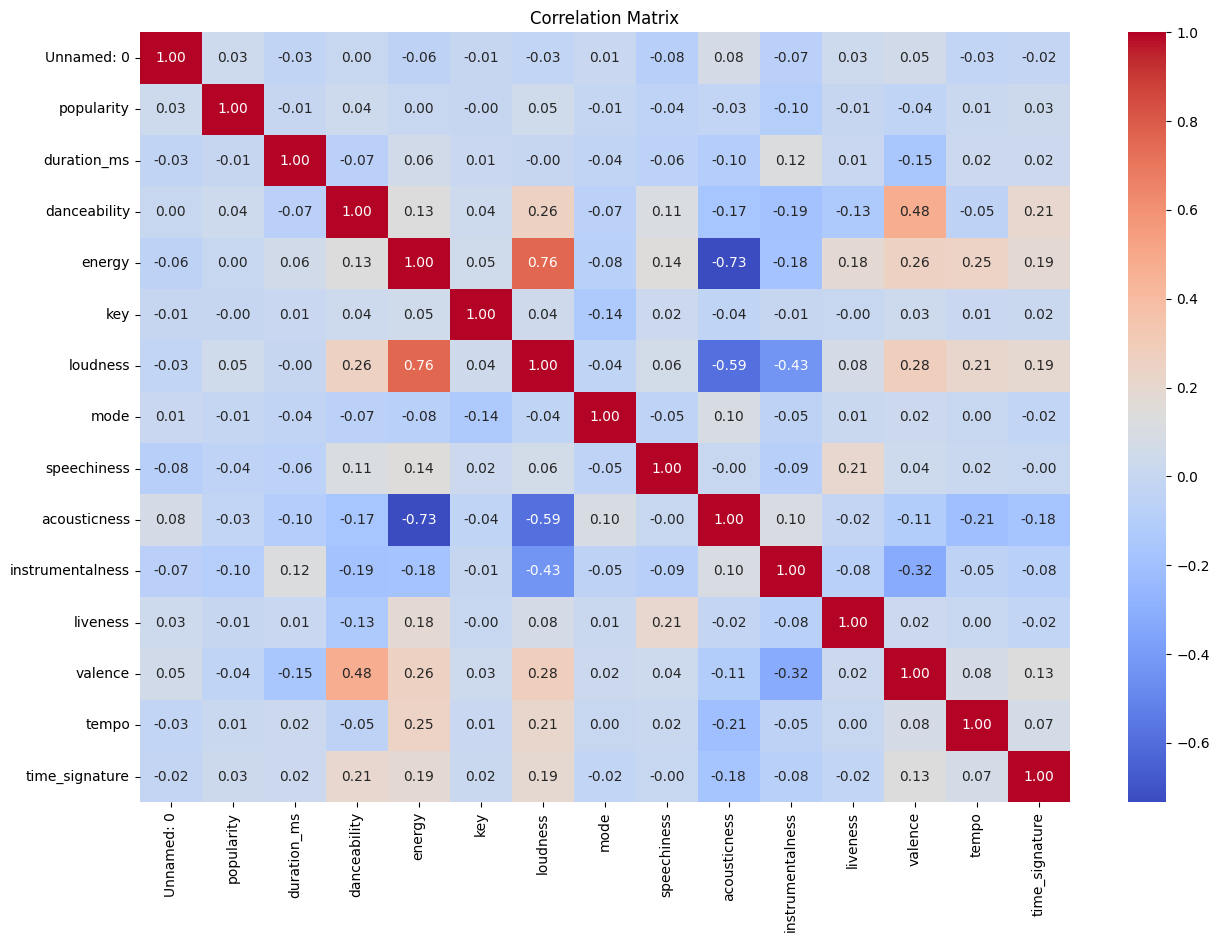

In [11]:
#correlation matrix
numerical_data = spotify_data.select_dtypes(include=[float, int])
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

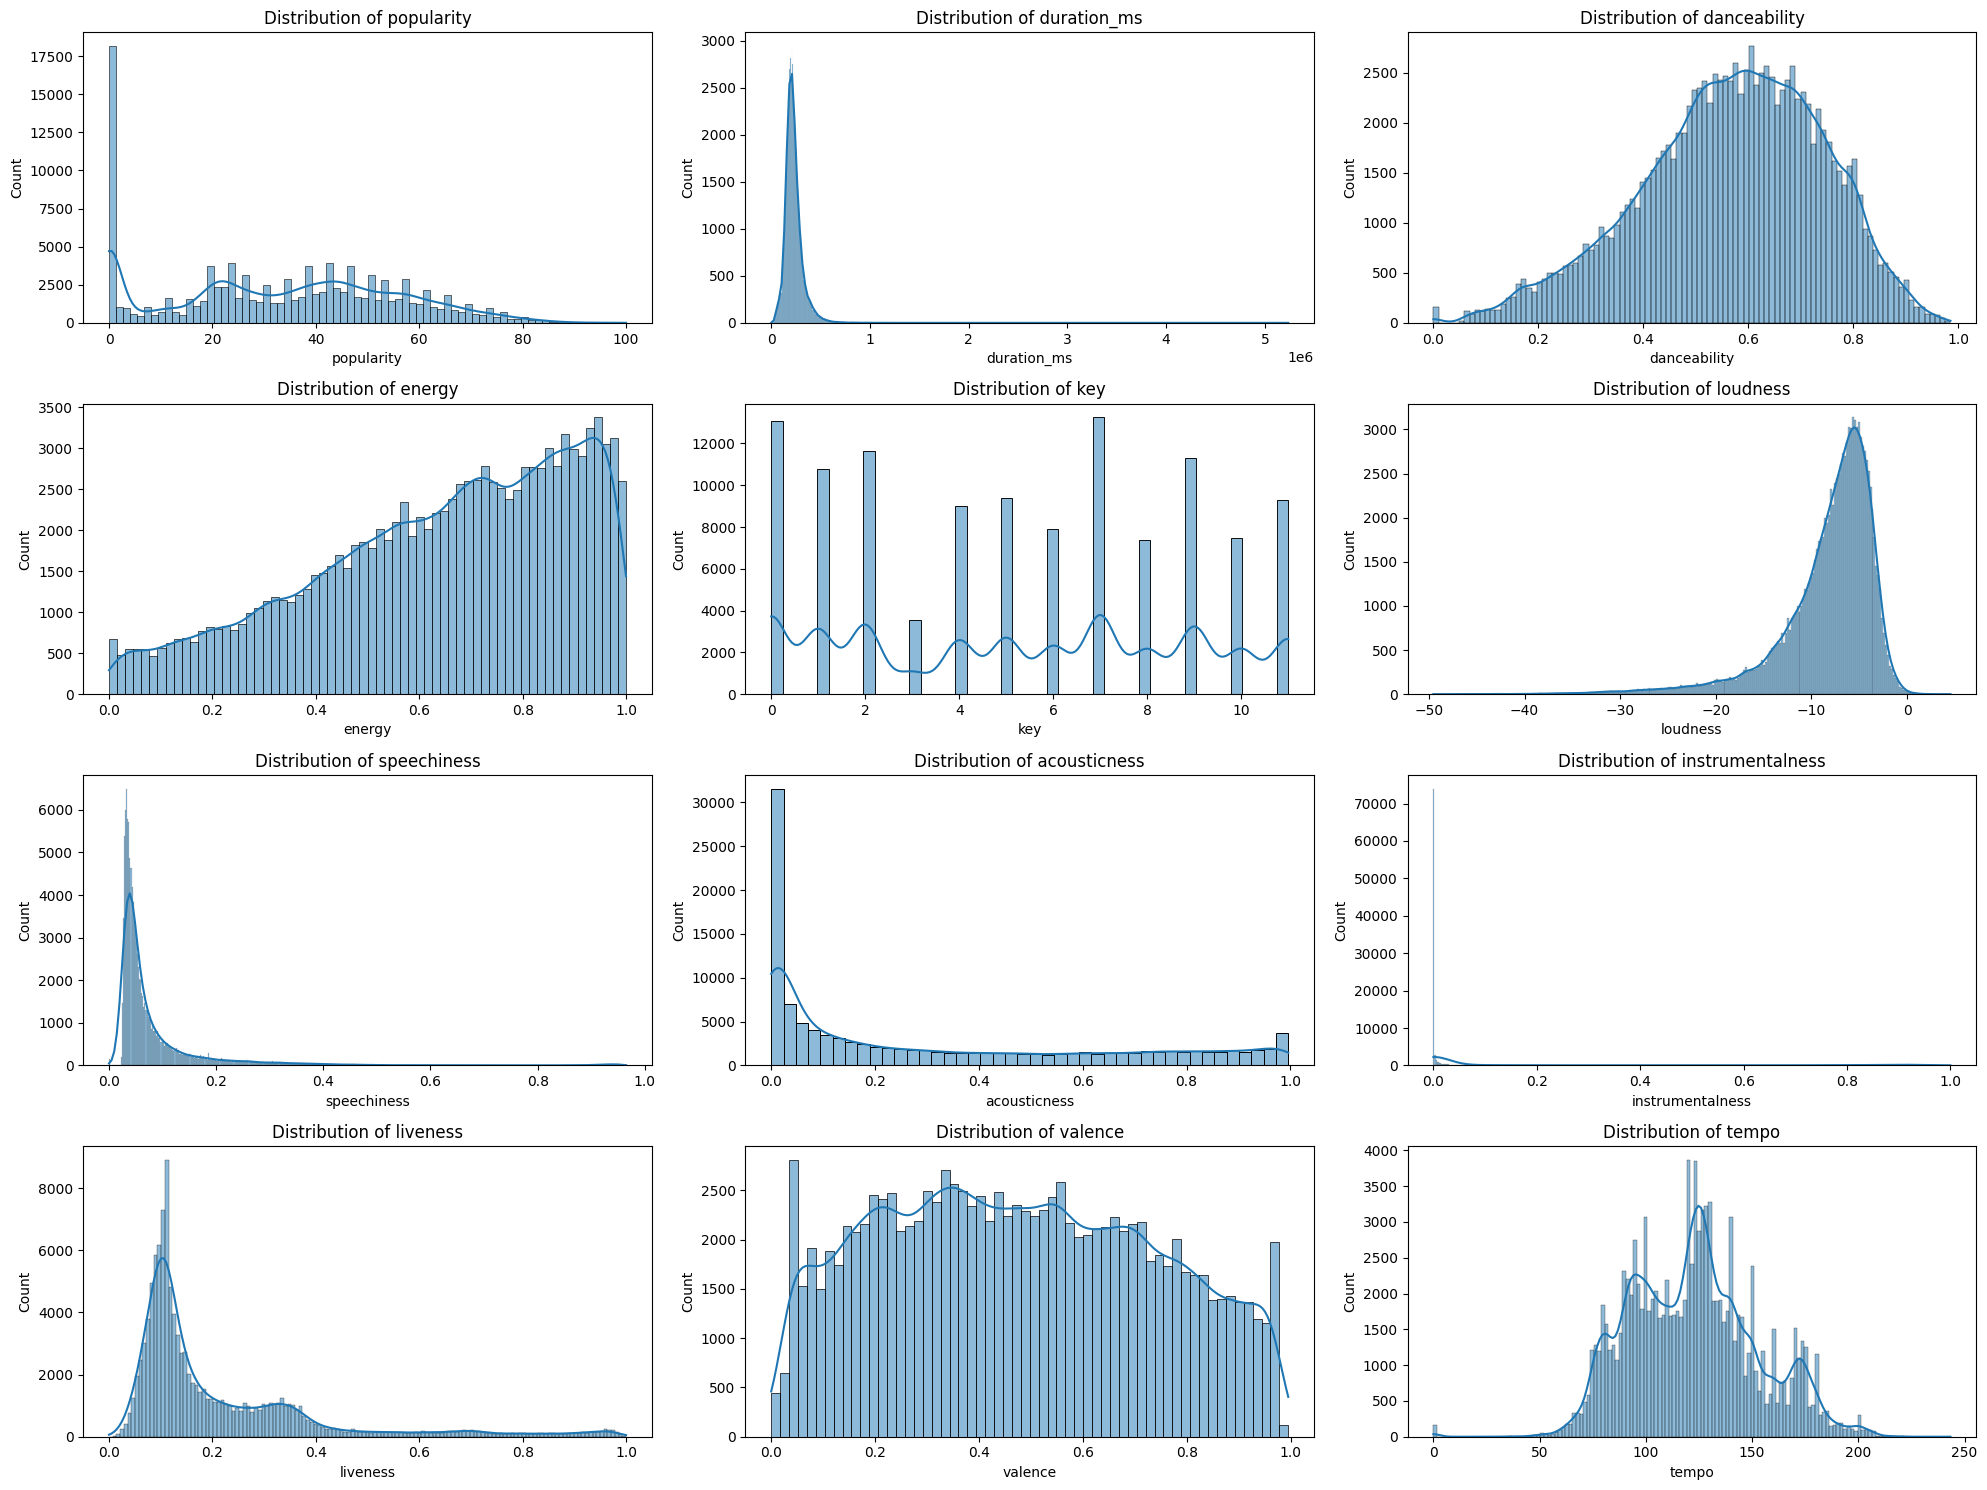

In [12]:
#Distribution plots
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(spotify_data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

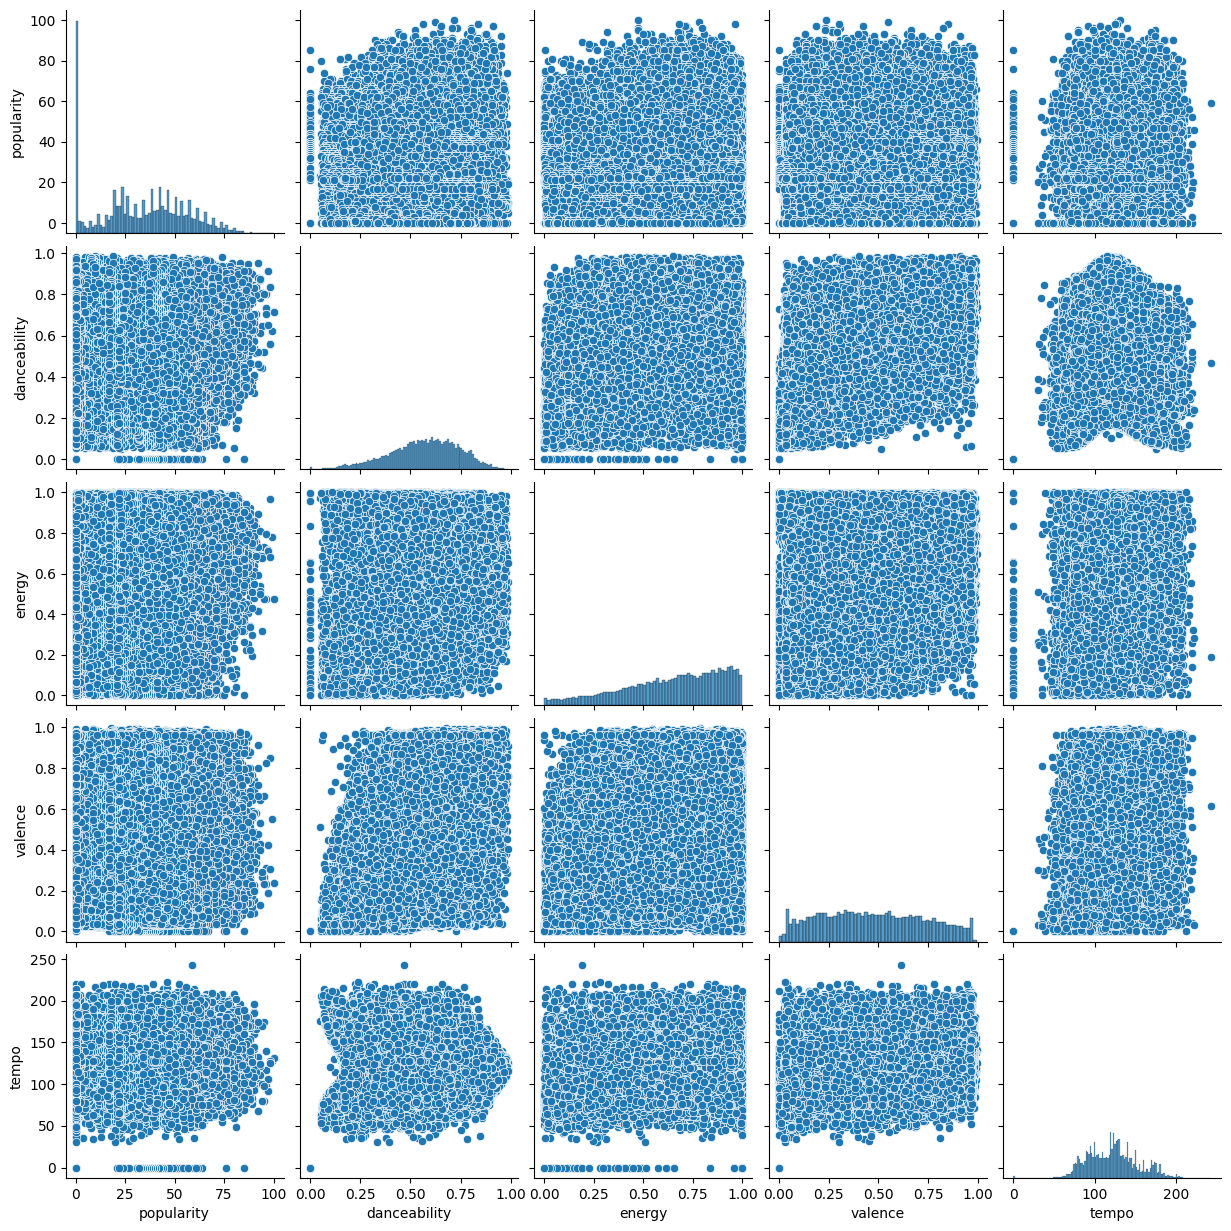

In [13]:
# Pairplot for selected features
selected_features = ['popularity', 'danceability', 'energy', 'valence', 'tempo']
sns.pairplot(spotify_data[selected_features])
plt.show()

**Preprocessing**

In [14]:
# Convert duration from milliseconds to seconds
spotify_data['duration_sec'] = spotify_data['duration_ms'] / 1000

In [15]:
# Drop the original duration_ms column
spotify_data.drop(columns=['duration_ms'], inplace=True)

In [16]:
# Encode categorical variables
spotify_data['explicit'] = spotify_data['explicit'].astype(int)
spotify_data['mode'] = spotify_data['mode'].astype(int)

In [17]:
# One-hot encode the track genre
spotify_data = pd.get_dummies(spotify_data, columns = ['track_genre'])

In [18]:
# Save the preprocessed data to a new CSV file
preprocessed_file = 'Spotify_Data_Preprocessed.csv'
spotify_data.to_csv(preprocessed_file, index=False)

# Modeling

Split the data into train and test datasets

In [19]:
# Columns to drop from training variables
exclude_cols = ['popularity', 'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']

# Define train/test features
X = spotify_data.drop(columns=exclude_cols)
y = spotify_data['popularity']

# Step 4: Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the results
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (91200, 128)
X_test Shape: (22800, 128)
y_train Shape: (91200,)
y_test Shape: (22800,)


In [20]:
# Create Principal Components for modeling
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [21]:
# Create an empty DataFrame for metrics
metrics_df = pd.DataFrame(columns=['Model', 'Mean Squared Error',
                                   'Mean Absolute Error', 'R^2 Score'])

Linear Regression Model

In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import pandas as pd

# Set the seed for reproducibility
random_seed = 42

# Define the Linear Regression model
lr_model = LinearRegression()

# Define a valid range of n_splits to test
n_splits_range = [3, 5, 10]  # Remove 1 to avoid ValueError

# Initialize a DataFrame to store results
lr_split_results = pd.DataFrame(columns=['n_splits', 'Mean Squared Error',
                                         'Mean Absolute Error', 'R^2 Score'])

# Evaluate cross-validation performance for each number of splits
for n_splits in n_splits_range:
    # Initialize KFold with the current number of splits
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

    # Perform cross-validation
    mse_scores = cross_val_score(lr_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(lr_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(lr_model, X_train_pca, y_train, cv=kf,
                                scoring='r2')

    # Convert negative scores to positive for MSE and MAE
    mean_squared_error_cv = -mse_scores.mean()
    mean_absolute_error_cv = -mae_scores.mean()
    r2_score_cv = r2_scores.mean()

    # Append results to DataFrame
    lr_results = pd.DataFrame({
        'n_splits': [n_splits],
        'Mean Squared Error': [mean_squared_error_cv],
        'Mean Absolute Error': [mean_absolute_error_cv],
        'R^2 Score': [r2_score_cv]
    })
    lr_split_results = pd.concat([lr_split_results, lr_results],
                                 ignore_index=True)

lr_split_results

<ipython-input-22-e97b09a76b1c>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lr_split_results = pd.concat([lr_split_results, lr_results],


,n_splits,Mean Squared Error,Mean Absolute Error,R^2 Score
0,3,372.697662,14.192367,0.252380
1,5,372.572410,14.191702,0.252587
2,10,372.538732,14.190635,0.252577


In [23]:
# Determine the optimal number of splits based on the lowest Mean Squared Error
lr_optimal_index = lr_split_results['Mean Squared Error'].idxmin()
lr_optimal_metrics = lr_split_results.iloc[lr_optimal_index]

# Append the optimal model's metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Linear Regression'],
    'Mean Squared Error': [lr_optimal_metrics['Mean Squared Error']],
    'Mean Absolute Error': [lr_optimal_metrics['Mean Absolute Error']],
    'R^2 Score': [lr_optimal_metrics['R^2 Score']]
})], ignore_index=True)
metrics_df

<ipython-input-23-66d7ca23049f>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame({


,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Linear Regression,372.538732,14.190635,0.252577


Ridge Regression Model

In [24]:
# Define the Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=random_seed)

# Initialize a DataFrame to store results
ridge_split_results = pd.DataFrame(columns=['n_splits', 'Mean Squared Error',
                                            'Mean Absolute Error', 'R^2 Score'])

# Evaluate cross-validation performance for each number of splits
for n_splits in n_splits_range:
    # Initialize KFold with the current number of splits
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

    # Perform cross-validation
    mse_scores = cross_val_score(ridge_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(ridge_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(ridge_model, X_train_pca, y_train, cv=kf,
                                scoring='r2')

    # Convert negative scores to positive for MSE and MAE
    mean_squared_error_cv = -mse_scores.mean()
    mean_absolute_error_cv = -mae_scores.mean()
    r2_score_cv = r2_scores.mean()

    # Append results to DataFrame
    ridge_results = pd.DataFrame({
        'n_splits': [n_splits],
        'Mean Squared Error': [mean_squared_error_cv],
        'Mean Absolute Error': [mean_absolute_error_cv],
        'R^2 Score': [r2_score_cv]
    })
    ridge_split_results = pd.concat([ridge_split_results, ridge_results],
                                    ignore_index=True)
ridge_split_results

<ipython-input-24-bb53b19a2802>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ridge_split_results = pd.concat([ridge_split_results, ridge_results],


,n_splits,Mean Squared Error,Mean Absolute Error,R^2 Score
0,3,372.697637,14.192401,0.252380
1,5,372.572392,14.191731,0.252587
2,10,372.538717,14.190661,0.252577


In [25]:
# Determine the optimal number of splits based on the lowest Mean Squared Error
ridge_optimal_index = ridge_split_results['Mean Squared Error'].idxmin()
ridge_optimal_metrics = ridge_split_results.iloc[ridge_optimal_index]

# Append the optimal model's metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Ridge Regression'],
    'Mean Squared Error': [ridge_optimal_metrics['Mean Squared Error']],
    'Mean Absolute Error': [ridge_optimal_metrics['Mean Absolute Error']],
    'R^2 Score': [ridge_optimal_metrics['R^2 Score']]
})], ignore_index=True)
metrics_df.sort_values(by='Mean Absolute Error', ascending=True).reset_index(drop=True)

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Linear Regression,372.538732,14.190635,0.252577
1,Ridge Regression,372.538717,14.190661,0.252577


Lasso Regression Model

In [26]:
# Define the Ridge Regression model
lasso_model = Lasso(alpha=1.0, random_state=random_seed)

# Initialize a DataFrame to store results
lasso_split_results = pd.DataFrame(columns=['n_splits', 'Mean Squared Error',
                                            'Mean Absolute Error', 'R^2 Score'])

# Evaluate cross-validation performance for each number of splits
for n_splits in n_splits_range:
    # Initialize KFold with the current number of splits
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

    # Perform cross-validation
    mse_scores = cross_val_score(lasso_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(lasso_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(lasso_model, X_train_pca, y_train, cv=kf,
                                scoring='r2')

    # Convert negative scores to positive for MSE and MAE
    mean_squared_error_cv = -mse_scores.mean()
    mean_absolute_error_cv = -mae_scores.mean()
    r2_score_cv = r2_scores.mean()

    # Append results to DataFrame
    lasso_results = pd.DataFrame({
        'n_splits': [n_splits],
        'Mean Squared Error': [mean_squared_error_cv],
        'Mean Absolute Error': [mean_absolute_error_cv],
        'R^2 Score': [r2_score_cv]
    })
    lasso_split_results = pd.concat([lasso_split_results, lasso_results],
                                    ignore_index=True)
lasso_split_results

<ipython-input-26-e1be4f3126e1>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lasso_split_results = pd.concat([lasso_split_results, lasso_results],


,n_splits,Mean Squared Error,Mean Absolute Error,R^2 Score
0,3,426.145699,16.795018,0.145164
1,5,426.206858,16.796761,0.144999
2,10,426.208783,16.796989,0.144915


In [27]:
# Determine the optimal number of splits based on the lowest Mean Squared Error
lasso_optimal_index = lasso_split_results['Mean Squared Error'].idxmin()
lasso_optimal_metrics = lasso_split_results.iloc[lasso_optimal_index]

# Append the optimal model's metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Lasso Regression'],
    'Mean Squared Error': [lasso_optimal_metrics['Mean Squared Error']],
    'Mean Absolute Error': [lasso_optimal_metrics['Mean Absolute Error']],
    'R^2 Score': [lasso_optimal_metrics['R^2 Score']]
})], ignore_index=True)
metrics_df.sort_values(by='Mean Absolute Error', ascending=True).reset_index(drop=True)

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Linear Regression,372.538732,14.190635,0.252577
1,Ridge Regression,372.538717,14.190661,0.252577
2,Lasso Regression,426.145699,16.795018,0.145164


Decision Tree Model

In [28]:
# Define the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=random_seed)

# Initialize a DataFrame to store results
dt_split_results = pd.DataFrame(columns=['n_splits', 'Mean Squared Error',
                                         'Mean Absolute Error', 'R^2 Score'])

# Evaluate cross-validation performance for each number of splits
for n_splits in n_splits_range:
    # Initialize KFold with the current number of splits
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

    # Perform cross-validation
    mse_scores = cross_val_score(decision_tree_model, X_train_pca, y_train,
                                 cv=kf, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(decision_tree_model, X_train_pca, y_train,
                                 cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(decision_tree_model, X_train_pca, y_train,
                                cv=kf, scoring='r2')

    # Convert negative scores to positive for MSE and MAE
    mean_squared_error_cv = -mse_scores.mean()
    mean_absolute_error_cv = -mae_scores.mean()
    r2_score_cv = r2_scores.mean()

    # Append results to DataFrame
    dt_results = pd.DataFrame({
        'n_splits': [n_splits],
        'Mean Squared Error': [mean_squared_error_cv],
        'Mean Absolute Error': [mean_absolute_error_cv],
        'R^2 Score': [r2_score_cv]
    })
    dt_split_results = pd.concat([dt_split_results, dt_results],
                                 ignore_index=True)
dt_split_results

<ipython-input-28-6070508c13c2>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dt_split_results = pd.concat([dt_split_results, dt_results],


,n_splits,Mean Squared Error,Mean Absolute Error,R^2 Score
0,3,566.301928,14.826482,-0.136017
1,5,555.744030,14.616261,-0.114870
2,10,544.211264,14.456210,-0.091799


In [29]:
# Determine the optimal number of splits based on the lowest Mean Squared Error
dt_optimal_index = dt_split_results['Mean Squared Error'].idxmin()
dt_optimal_metrics = dt_split_results.iloc[dt_optimal_index]

# Append the optimal model's metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Decision Tree'],
    'Mean Squared Error': [dt_optimal_metrics['Mean Squared Error']],
    'Mean Absolute Error': [dt_optimal_metrics['Mean Absolute Error']],
    'R^2 Score': [dt_optimal_metrics['R^2 Score']]
})], ignore_index=True)
metrics_df.sort_values(by='Mean Absolute Error', ascending=True).reset_index(drop=True)

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Linear Regression,372.538732,14.190635,0.252577
1,Ridge Regression,372.538717,14.190661,0.252577
2,Decision Tree,544.211264,14.456210,-0.091799
3,Lasso Regression,426.145699,16.795018,0.145164


Gradient Boosting Machines Model

In [34]:
# Create and train the Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=20, random_state=random_seed)
gbm_model.fit(X_train_pca, y_train)

# Make predictions with the Gradient Boosting model
gbm_pred = gbm_model.predict(X_test_pca)

# Calculate metrics for Gradient Boosting model
gbm_mse = mean_squared_error(y_test, gbm_pred)
gbm_mae = mean_absolute_error(y_test, gbm_pred)
gbm_r2 = r2_score(y_test, gbm_pred)

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Linear Regression,372.538732,14.190635,0.252577
1,Ridge Regression,372.538717,14.190661,0.252577
2,Decision Tree,544.211264,14.456210,-0.091799
3,Gradient Boosting Regression,394.374906,15.825169,0.200830
4,Lasso Regression,426.145699,16.795018,0.145164


In [49]:
# Create DataFrame for Gradient Boosting metrics
gbm_df = pd.DataFrame({
    'Model': ['GBM'],
    'Mean Squared Error': [gbm_mse],
    'Mean Absolute Error': [gbm_mae],
    'R^2 Score': [gbm_r2]
})

# Append Gradient Boosting metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, gbm_df], ignore_index=True)
metrics_df.sort_values(by='Mean Absolute Error', ascending=True).reset_index(drop=True)

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Support Vector Regression,398.678366,12.567078,0.192110
1,XGBoost,326.228697,12.843054,0.345511
2,Artifical Neural Network,337.174581,12.986010,0.316742
3,K-Nearest Neighbor,371.434853,12.999465,0.254753
4,K-Nearest Neighbor,371.434853,12.999465,0.254753
5,Linear Regression,372.538732,14.190635,0.252577
6,Ridge Regression,372.538717,14.190661,0.252577
7,Decision Tree,544.211264,14.456210,-0.091799
8,Gradient Boosting Regression,394.374906,15.825169,0.200830
9,GBM,394.374906,15.825169,0.200830


XGBoost Model

In [35]:
# Define the Gradient Boosting Machines model
xgb_model = XGBRegressor(random_state=random_seed)

# Initialize a DataFrame to store results
xgb_split_results = pd.DataFrame(columns=['n_splits', 'Mean Squared Error',
                                          'Mean Absolute Error', 'R^2 Score'])

# Evaluate cross-validation performance for each number of splits
for n_splits in n_splits_range:
    # Initialize KFold with the current number of splits
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

    # Perform cross-validation
    mse_scores = cross_val_score(xgb_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(xgb_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(xgb_model, X_train_pca, y_train, cv=kf,
                                scoring='r2')

    # Convert negative scores to positive for MSE and MAE
    mean_squared_error_cv = -mse_scores.mean()
    mean_absolute_error_cv = -mae_scores.mean()
    r2_score_cv = r2_scores.mean()

    # Append results to DataFrame
    xgb_results = pd.DataFrame({
        'n_splits': [n_splits],
        'Mean Squared Error': [mean_squared_error_cv],
        'Mean Absolute Error': [mean_absolute_error_cv],
        'R^2 Score': [r2_score_cv]
    })
    xgb_split_results = pd.concat([xgb_split_results, xgb_results], ignore_index=True)
xgb_split_results

<ipython-input-35-28e1523be5dd>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  xgb_split_results = pd.concat([xgb_split_results, xgb_results], ignore_index=True)


,n_splits,Mean Squared Error,Mean Absolute Error,R^2 Score
0,3,332.288289,12.931971,0.333442
1,5,327.853593,12.849376,0.342292
2,10,326.228697,12.843054,0.345511


In [36]:
# Determine the optimal number of splits based on the lowest Mean Squared Error
xgb_optimal_index = xgb_split_results['Mean Squared Error'].idxmin()
xgb_optimal_metrics = xgb_split_results.iloc[xgb_optimal_index]

# Append the optimal model's metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['XGBoost'],
    'Mean Squared Error': [xgb_optimal_metrics['Mean Squared Error']],
    'Mean Absolute Error': [xgb_optimal_metrics['Mean Absolute Error']],
    'R^2 Score': [xgb_optimal_metrics['R^2 Score']]
})], ignore_index=True)
metrics_df.sort_values(by='Mean Absolute Error', ascending=True).reset_index(drop=True)

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,XGBoost,326.228697,12.843054,0.345511
1,Linear Regression,372.538732,14.190635,0.252577
2,Ridge Regression,372.538717,14.190661,0.252577
3,Decision Tree,544.211264,14.456210,-0.091799
4,Gradient Boosting Regression,394.374906,15.825169,0.200830
5,Lasso Regression,426.145699,16.795018,0.145164


Support Vector Regression Model

In [44]:
# Initialize imputer to fill any remaining NaNs
imputer = SimpleImputer(strategy='mean')  # Or any other suitable strategy

# Fit and transform on training data, then transform testing data
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Initialize and train the SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Make predictions
svr_preds = svr_model.predict(X_test_scaled)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_preds)
svr_mae = mean_absolute_error(y_test, svr_preds)
svr_r2 = r2_score(y_test, svr_preds)

# Create DataFrame for SVR metrics
svr_df = pd.DataFrame({
    'Model': ['Support Vector Regression'],
    'Mean Squared Error': [svr_mse],
    'Mean Absolute Error': [svr_mae],
    'R^2 Score': [svr_r2]
})

# Append SVR metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, svr_df], ignore_index=True)
metrics_df.sort_values(by='Mean Absolute Error', ascending=True).reset_index(drop=True)

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Support Vector Regression,398.678366,12.567078,0.192110
1,XGBoost,326.228697,12.843054,0.345511
2,Artifical Neural Network,337.174581,12.986010,0.316742
3,K-Nearest Neighbor,371.434853,12.999465,0.254753
4,Linear Regression,372.538732,14.190635,0.252577
5,Ridge Regression,372.538717,14.190661,0.252577
6,Decision Tree,544.211264,14.456210,-0.091799
7,Gradient Boosting Regression,394.374906,15.825169,0.200830
8,Lasso Regression,426.145699,16.795018,0.145164


Artifical Neural Networks Model

In [38]:
# Initialize the ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
ann_preds = ann_model.predict(X_test_scaled).flatten()

# Evaluate the model
ann_mse = mean_squared_error(y_test, ann_preds)
ann_mae = mean_absolute_error(y_test, ann_preds)
ann_r2 = r2_score(y_test, ann_preds)

# Create DataFrame for ANN metrics
ann_df = pd.DataFrame({
    'Model': ['Artifical Neural Network'],
    'Mean Squared Error': [ann_mse],
    'Mean Absolute Error': [ann_mae],
    'R^2 Score': [ann_r2]
})

# Append ANN metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, ann_df], ignore_index=True)
metrics_df.sort_values(by='Mean Absolute Error', ascending=True).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 451.2095
Epoch 2/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 363.7953
Epoch 3/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 358.0185
Epoch 4/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 350.9702
Epoch 5/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 350.4651
Epoch 6/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 342.6897
Epoch 7/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 340.1631
Epoch 8/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 334.3885
Epoch 9/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 331.5842
Epoch 10/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 326.9058
Epoch 11/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 324.6358
Epoch 12/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 323.4911
Epoch 13/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 316.9579
Epoch 14/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 312.9904


,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Linear Regression,372.538732,14.190635,0.252577
1,Ridge Regression,372.538717,14.190661,0.252577
2,Lasso Regression,426.145699,16.795018,0.145164
3,Decision Tree,544.211264,14.456210,-0.091799
4,Gradient Boosting Regression,394.374906,15.825169,0.200830
5,XGBoost,326.228697,12.843054,0.345511
6,Artifical Neural Network,337.174581,12.986010,0.316742


K-Nearest Neighbor Model

In [39]:
# Define the Gradient Boosting Machines model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Initialize a DataFrame to store results
knn_split_results = pd.DataFrame(columns=['n_splits', 'Mean Squared Error',
                                          'Mean Absolute Error', 'R^2 Score'])

# Evaluate cross-validation performance for each number of splits
for n_splits in n_splits_range:
    # Initialize KFold with the current number of splits
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

    # Perform cross-validation
    mse_scores = cross_val_score(knn_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(knn_model, X_train_pca, y_train, cv=kf,
                                 scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(knn_model, X_train_pca, y_train, cv=kf,
                                scoring='r2')

    # Convert negative scores to positive for MSE and MAE
    mean_squared_error_cv = -mse_scores.mean()
    mean_absolute_error_cv = -mae_scores.mean()
    r2_score_cv = r2_scores.mean()

    # Append results to DataFrame
    knn_results = pd.DataFrame({
        'n_splits': [n_splits],
        'Mean Squared Error': [mean_squared_error_cv],
        'Mean Absolute Error': [mean_absolute_error_cv],
        'R^2 Score': [r2_score_cv]
    })
    knn_split_results = pd.concat([knn_split_results, knn_results], ignore_index=True)
knn_split_results

<ipython-input-39-b366ae7f9d47>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  knn_split_results = pd.concat([knn_split_results, knn_results], ignore_index=True)


,n_splits,Mean Squared Error,Mean Absolute Error,R^2 Score
0,3,381.302929,13.248239,0.235128
1,5,375.342865,13.104096,0.247017
2,10,371.434853,12.999465,0.254753


In [55]:
# Determine the optimal number of splits based on the lowest Mean Squared Error
knn_optimal_index = knn_split_results['Mean Squared Error'].idxmin()
knn_optimal_metrics = knn_split_results.iloc[knn_optimal_index]

# Append the optimal model's metrics to the existing metrics DataFrame
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['K-Nearest Neighbor'],
    'Mean Squared Error': [knn_optimal_metrics['Mean Squared Error']],
    'Mean Absolute Error': [knn_optimal_metrics['Mean Absolute Error']],
    'R^2 Score': [knn_optimal_metrics['R^2 Score']]
})], ignore_index=True)
metrics_df.sort_values(by='Mean Absolute Error', ascending=True).reset_index(drop=True)

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score
0,Support Vector Regression,398.678366,12.567078,0.192110
1,XGBoost,326.228697,12.843054,0.345511
2,Artifical Neural Network,337.174581,12.986010,0.316742
3,K-Nearest Neighbor,371.434853,12.999465,0.254753
4,Linear Regression,372.538732,14.190635,0.252577
5,Ridge Regression,372.538717,14.190661,0.252577
6,Decision Tree,544.211264,14.456210,-0.091799
7,GBM,394.374906,15.825169,0.200830
8,Lasso Regression,426.145699,16.795018,0.145164


Plot Evaluation Metrics

<ipython-input-56-6fe86f819036>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Squared Error', data=metrics_df, palette='viridis')


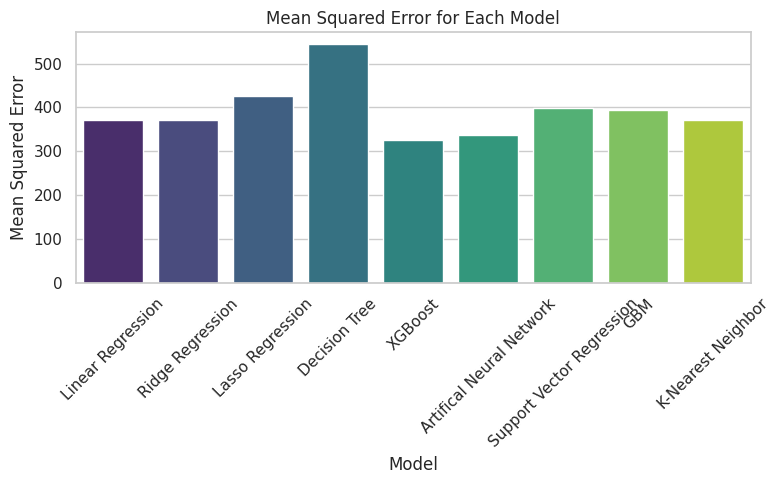

In [56]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Mean Squared Error', data=metrics_df, palette='viridis')
plt.title('Mean Squared Error for Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-57-2ff514842b19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Absolute Error', data=metrics_df, palette='viridis')


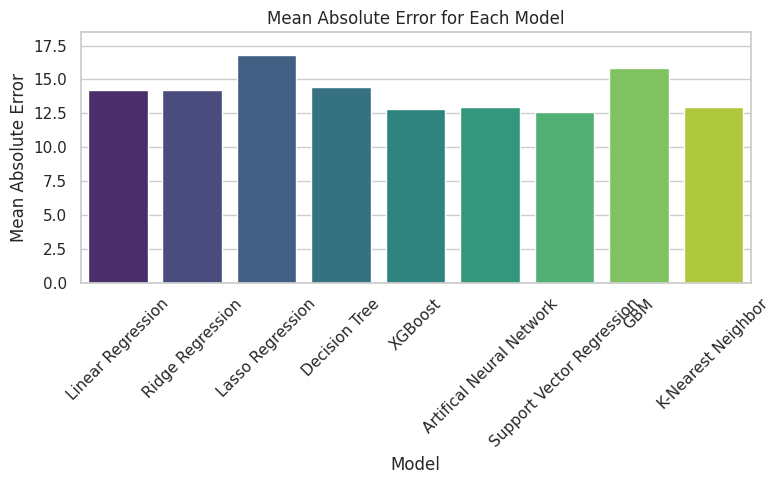

In [57]:
# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Mean Absolute Error', data=metrics_df, palette='viridis')
plt.title('Mean Absolute Error for Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.ylim(0, metrics_df['Mean Absolute Error'].max() * 1.1)
plt.tight_layout()
plt.show()

<ipython-input-58-ff6d27a1db85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R^2 Score', data=metrics_df, palette='viridis')


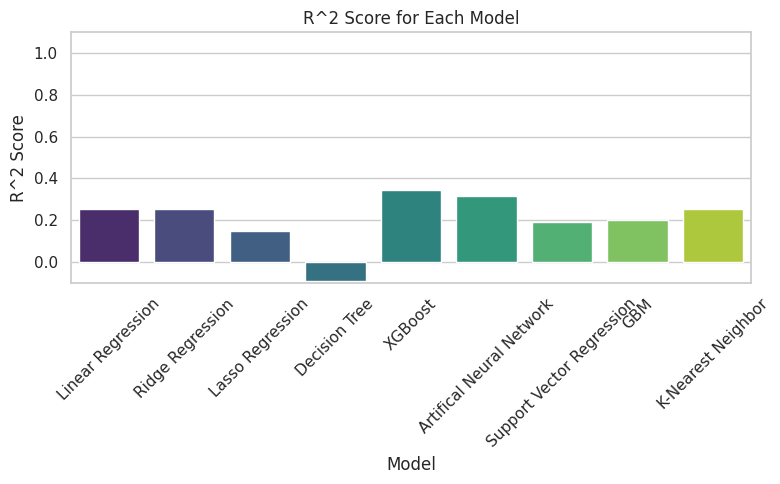

In [58]:
# Plot R^2 Score
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R^2 Score', data=metrics_df, palette='viridis')
plt.title('R^2 Score for Each Model')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.ylim(min(0, metrics_df['R^2 Score'].min() * 1.1), 1.1)
plt.tight_layout()
plt.show()